<a href="https://colab.research.google.com/github/kanchanrenpou/gitpython/blob/master/datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.DataFrame(
    [{"start": "00:01:00.001", "end": "00:05:02.002"},
     {"start": "00:02:02.001", "end": "00:06:03.002"},
     {"start": "00:04:04.001", "end": "00:05:08.002"},
     {"start": "00:02:06.001", "end": "00:03:05.002"}]
)

In [46]:
def conv2ts(log):
    hh, mm, s = log.split(":")
    ss, mss = s.split(".")
    ts = (int(hh) * 3600 + int(mm) * 60 + int(ss)) * 1000 + int(mss)
    return ts

In [47]:
for i, row in df.iterrows():
    df.at[i, "t_s"] = conv2ts(row["start"])
    df.at[i, "t_f"] = conv2ts(row["end"])

df

,start,end,t_s,t_f
0,00:01:00.001,00:05:02.002,60001.0,302002.0
1,00:02:02.001,00:06:03.002,122001.0,363002.0
2,00:04:04.001,00:05:08.002,244001.0,308002.0
3,00:02:06.001,00:03:05.002,126001.0,185002.0


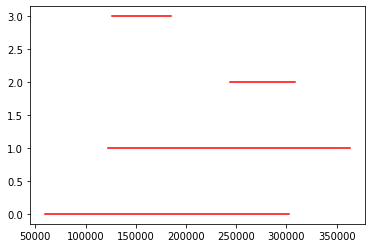

In [48]:
for i, row in df.iterrows():
    plt.plot([row["t_s"], row["t_f"]], [i, i], color="red")

In [49]:
df["s1"] = "start"
df["s2"] = "end"
df_m = pd.concat([pd.concat([df["t_s"], df["t_f"]]), pd.concat([df["s1"], df["s2"]])], axis=1)
df_m.columns=["time", "event"]
df_m

,time,event
0,60001.0,start
1,122001.0,start
2,244001.0,start
3,126001.0,start
0,302002.0,end
1,363002.0,end
2,308002.0,end
3,185002.0,end


In [51]:
df_m = df_m.sort_values("time")

In [52]:
count = 0
for i, row in df_m.iterrows():
    if row["event"] == "start":
        count += 1
    else:
        count -= 1
    df_m.at[i, "count"] = count
df_m

,time,event,count
0,60001.0,start,2.0
1,122001.0,start,0.0
3,126001.0,start,2.0
3,185002.0,end,2.0
2,244001.0,start,1.0
0,302002.0,end,2.0
2,308002.0,end,1.0
1,363002.0,end,0.0


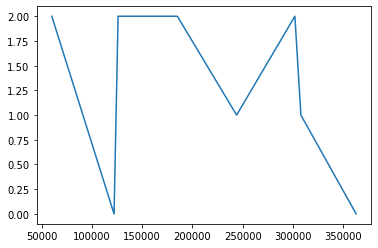

In [54]:
plt.plot(df_m["time"], df_m["count"])

In [55]:
import datetime

In [61]:
d = datetime.datetime(2022, 6, 21, 12, 20, 0, 123*100)

In [62]:
print(d)

2022-06-21 12:20:00.012300


In [65]:
def conv2datetime(aws_ts):
    mss = int(aws_ts % 1000)
    s_all = (int(aws_ts) - mss) // 1000
    ss = s_all % 60
    m_all = (s_all - ss) // 60
    mm = m_all % 60
    h_all = (m_all - mm) // 60
    hh = h_all % 24
    return datetime.datetime.fromtimestamp(aws_ts * 1000)


In [87]:
conv2datetime(1604751.6120198)

datetime.datetime(2020, 11, 7, 12, 20, 12, 19800)

In [95]:
16047516120198 / (10 ** 7)

1604751.6120198